# 1.감성대화말뭉치

In [40]:
import pandas as pd

file1_train = 'data/감성대화말뭉치(최종데이터)_Training.csv'
file1_test = 'data/감성대화말뭉치(최종데이터)_Validation.csv'

train1  = pd.read_csv(file1_train)
test1 = pd.read_csv(file1_test)

### 문장, 감정 대분류 칼럼만 남기고 순서바꾸기

In [41]:
# 대분류, 문장 칼럼만 추출
train1 = train1[['감정_대분류','사람문장1']]
test1 = test1[['감정_대분류','사람문장1']]

# # 감정을 정수 라벨로 변경
# emotions = {'기쁨': 0, '불안': 1, '당황': 2, '슬픔': 3, '분노': 4, '상처': 5}
# train1['emotion'] = train1.emotion.map(emotions)

#칼럼이름 변경하고 순서 바꾸기
train1.columns = ['emotion', 'sentence']
test1.columns = ['emotion', 'sentence']  
train1 = train1.reindex(columns=['sentence', 'emotion'])
test1 = test1.reindex(columns=['sentence', 'emotion'])

train1.sample(n=5)

,sentence,emotion
3978,몇 주 뒤면 결혼식인데 결혼식을 못 하게 생겼어.,불안
28920,좋은 일이 있었어.,기쁨
43134,부모님에게 계속 의지하는 게 좋을까. 아무런 쓸모도 없는 사람 같아서 죽고 싶어.,분노
28309,늙으니 할 수 있는 일이 없어서 내 용돈벌이도 못하는 게 너무 속상해.,슬픔
14820,해냈어! 드디어 우리 부서가 에이 팀을 이겼어!,기쁨


### 데이터 수 & 결측치 확인

In [42]:
print(train1.info(),end ='\n\n')
print(test1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  51630 non-null  object
 1   emotion   51630 non-null  object
dtypes: object(2)
memory usage: 806.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  6641 non-null   object
 1   emotion   6641 non-null   object
dtypes: object(2)
memory usage: 103.9+ KB
None


In [43]:
print(train1.isnull().sum(), end = '\n\n')
print(test1.isnull().sum())

sentence    0
emotion     0
dtype: int64

sentence    0
emotion     0
dtype: int64


### 감성 대화 말뭉치 합쳐서 csv 파일로 다시 저장

In [ ]:
# file_names = ['data/감성대화말뭉치(최종데이터)_Training.csv','data/감성대화말뭉치(최종데이터)_Validation.csv']
# for file_name in file_names:
#     temp = pd.read_csv(file_name, sep='구분자', encoding='utf-8') #csv파일을 하나씩 열어 임시 데이터프레임으로 생성한다
#     total = pd.concat([total, temp]) #전체 데이터프레임에 추가하여 넣는다

# total.to_csv("data/감성대화망뭉치(병합).csv")

In [45]:
# 전처리된 데이터프레임 합치고 csv로 저장   
temp  = pd.concat([train1, test1])
temp    #행 숫자보면 합쳐진거 맞는데 왜 test1 행번호가 그대로일까..

,sentence,emotion
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,분노
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,분노
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,분노
...,...,...
6636,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,당황
6637,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,당황
6638,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,당황
6639,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,당황


  
중복 행 제거

In [49]:
dup = temp[temp.duplicated(subset=['sentence'])]
print("중복되는 행: ", len(dup))

temp = temp.drop_duplicates(subset=['sentence'], keep='first')
len(temp)

중복되는 행:  31


58240

In [52]:
temp.to_csv("data/감성대화말뭉치(병합).csv")

In [53]:
import pandas as pd

# 다시 불러와서
train1  = pd.read_csv("data/감성대화말뭉치(병합).csv", index_col=0) #첫 번째 열이 인덱스 열일 때 Unnamed: 0 빼기
train1
# train1.sample(n=5)

,sentence,emotion
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,분노
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,분노
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,분노
...,...,...
6636,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,당황
6637,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,당황
6638,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,당황
6639,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,당황


### **감정 별 문장 분포**

In [54]:
# 감정 분포 확인
train1.groupby('emotion').count().iloc[:,0]

emotion
기쁨     7337
당황     9797
분노    10414
불안    10429
상처    10142
슬픔    10121
Name: sentence, dtype: int64

In [3]:
import matplotlib.pyplot as plt

# 가능한 font 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

# # 확인 이후
# plt.font_manager._rebuild() //이제 안쓴다

['STIXNonUnicode', 'DejaVu Sans', 'cmtt10', 'DejaVu Serif Display', 'DejaVu Sans Mono', 'cmmi10', 'DejaVu Serif', 'STIXSizeThreeSym', 'STIXNonUnicode', 'STIXSizeThreeSym', 'STIXGeneral', 'STIXSizeFiveSym', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Sans', 'cmr10', 'STIXSizeFourSym', 'STIXNonUnicode', 'STIXSizeTwoSym', 'cmex10', 'STIXGeneral', 'DejaVu Serif', 'cmb10', 'DejaVu Serif', 'STIXSizeFourSym', 'cmsy10', 'DejaVu Sans Display', 'STIXSizeOneSym', 'DejaVu Serif', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXGeneral', 'cmss10', 'Franklin Gothic Medium Cond', 'MoeumT R', 'Agency FB', 'HYMyeongJo-Extra', 'Georgia', 'Parchment', 'NanumSquare_ac', 'Monotype Corsiva', 'Rockwell', 'Microsoft PhagsPa', 'Century Schoolbook', 'Arial Rounded MT Bold', 'Palace Script MT', 'Elephant', 'HCR Batang ExtB', 'Garamond', 'Microsoft YaHei', 'Bodoni MT', 'Century Schoolbook', 'Nirmala UI', 'Constantia', 'Verdana', 'Wing

In [12]:
from matplotlib import font_manager, rc
font_path = r"C:\Users\inoo3\AppData\Local\Microsoft\Windows\Fonts\NanumSquare.ttf" # 사용할 폰트명 경로 삽입 (역슬래시 대신 슬래시)
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\

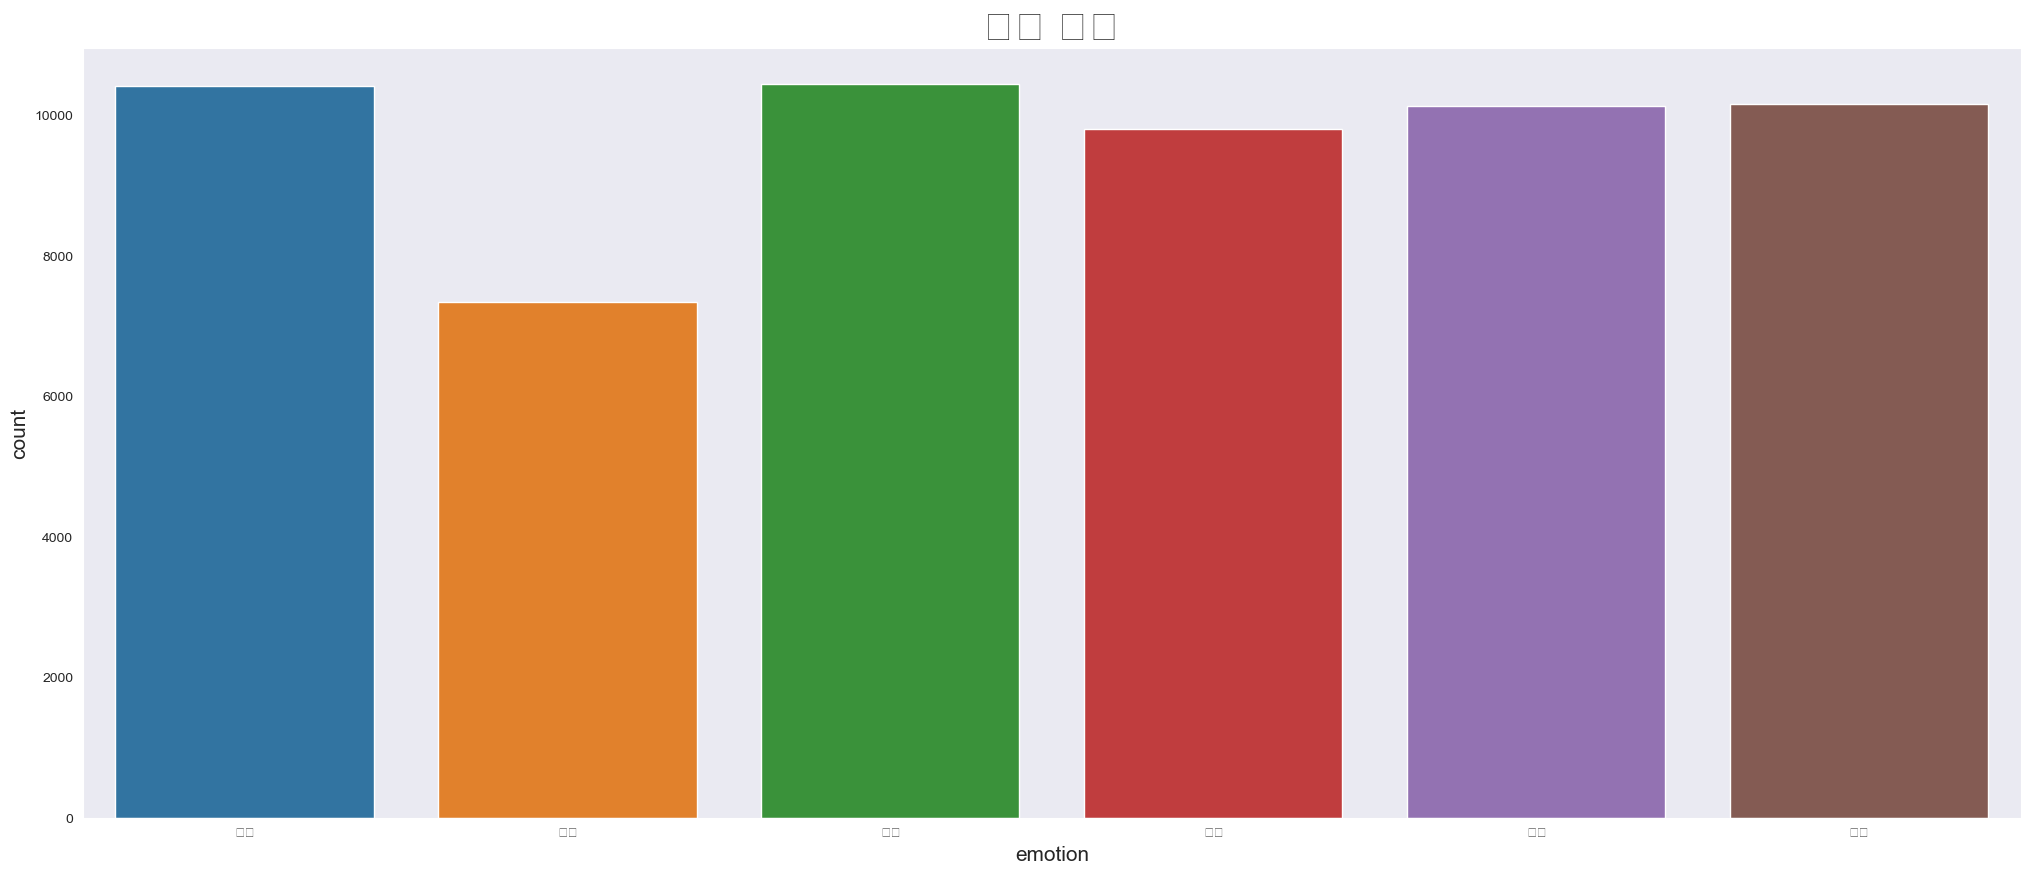

In [13]:
# countplot으로 시각화
import matplotlib.pyplot as plt
import seaborn as sns

#plt.rc('font', family='NanumSquare_ac')
plt.rcParams['figure.figsize'] = [25,10]
sns.set_style("dark")
sns.countplot(x='emotion',data=train1)
plt.title('감정 분포', fontsize=30)
plt.xlabel('emotion', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

# 정규화 필요한가?

# 2. 한국어 단발성 대화 데이터셋

In [55]:
import pandas as pd
file2_train = 'data/한국어_단발성_대화_데이터셋.csv'

train2 = pd.read_csv(file2_train)
train2.sample(n=5)

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468
28860,도니오빠도 하는 일들 모두 실타래 처럼 잘 풀렸음해요^^,행복,NaN,NaN,NaN,NaN,NaN
14587,책임있는 쌔뀌들아.,분노,NaN,NaN,NaN,NaN,NaN
9574,경호대는 놀았나? 왜 기록이 없지?,놀람,NaN,NaN,NaN,NaN,NaN
1487,살인행위네~~~~~,공포,NaN,NaN,NaN,NaN,NaN
31200,감사혀유!! ^^,행복,NaN,NaN,NaN,NaN,NaN


In [56]:
#필요한 칼럼만 추출
train2 = train2[['Sentence','Emotion']]

#칼럼이름 변경
train2.columns = ['sentence', 'emotion']
train2.sample(n=5)

,sentence,emotion
29956,어제 홈런은 정말 멋졌는데..,행복
3344,전 좋으면 괜찮을거라 생각들어서 과감히 사긴했는데 사고나니 걱정이 들긴해요,공포
31905,구위가 정말 좋았다.,행복
17015,중국은 그에비하면 양반격이지.,분노
6925,나는 이때까지 화가들이 자기혼자 다 그리는줄 알았네,놀람


결측치 확인

In [57]:
print(train2.info(), end = '\n\n')
print(train2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38594 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  38594 non-null  object
 1   emotion   38594 non-null  object
dtypes: object(2)
memory usage: 603.2+ KB
None

sentence    0
emotion     0
dtype: int64


중복행 확인, 제거

In [58]:
dup = train2[train2.duplicated(subset=['sentence'])]
print("중복되는 행: ", len(dup))

train2 = train2.drop_duplicates(subset=['sentence'], keep='first')
len(train2)

중복되는 행:  85


38509

In [59]:
# 감정 분포 확인
train2.groupby('emotion').count().iloc[:,0]

emotion
공포    5461
놀람    5886
분노    5662
슬픔    5244
중립    4827
행복    6003
혐오    5426
Name: sentence, dtype: int64

In [60]:
train2.to_csv("data/단발성대화.csv")

# 3. 한국어 연속적 대화 데이터셋

In [61]:
import pandas as pd
file3_train = 'data\한국어_연속적_대화_데이터셋.csv'    #슬라시 방향 상관 없다?

train3 = pd.read_csv(file3_train)
train3.sample(n=5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,행복,중립,슬픔,공포,혐오,분노,놀람
23837,NaN,뭐?,놀람,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26009,NaN,없어. 끊어.,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16977,NaN,나 걔네들한테 형 이름도 말해버렸는데...,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46026,NaN,잘될거에요. 보란 듯이 팀에 들어가서 아버지 자랑스런 아들 되드릴거에요.,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21571,NaN,당장은 편할지 모르지만 반환점에서 표식을 받은 이후로는 후발대가 훨씬 불리해. 지켜...,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#필요한 칼럼만 추출
train3 = train3[['Unnamed: 1','Unnamed: 2']]

#칼럼이름 변경
train3.columns = ['sentence', 'emotion']
train3.sample(n=5)

,sentence,emotion
17590,쟤 그럼 너한테 배운 거니?,놀람
38232,예?,놀람
53496,……여어.,중립
731,이제...저 물고기까지 봐야 합니까?,혐오
9428,그럼 신발 한짝 벗어놓고 가.,중립


In [63]:
print(train3.info(), end = '\n\n')
print(train3.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55629 entries, 0 to 55628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  55628 non-null  object
 1   emotion   55622 non-null  object
dtypes: object(2)
memory usage: 869.3+ KB
None

sentence    1
emotion     7
dtype: int64


결측치 존재 -> 결측치 있는 행 출력

In [64]:
null_df = train3[train3.isnull().any(axis=1)]
null_df

,sentence,emotion
3707,저도 저희 반 학생이 도둑질을 했다고 믿고 싶진 않아요. 아마 서로 오해가 있었던 ...,NaN
30644,다 봤니? 다 못 봤으면 나머지 해줄까?,NaN
31816,그러니까. 돌 같은 걸 씹어서 이가 부러진 경우가 아니면.실상 보상을 받을 수 없다...,NaN
46290,NaN,NaN
47149,뭐가?,NaN
48754,창업은 실제 해보니까 어땠어요?,NaN
50535,안에는 들어가 봤나?,NaN


**결측치 있는 행 삭제**  
55629 -> 55622, 7개 모두 지워진거 확인

In [65]:
train3 = train3.dropna()
train3.shape

(55622, 2)

중복 행 확인, 제거

In [66]:
dup = train3[train3.duplicated(subset=['sentence'])]
print("중복되는 행: ", len(dup))

train3 = train3.drop_duplicates(subset=['sentence'], keep='first')
len(train3)

중복되는 행:  4389


51233

In [67]:
# 감정 분포 확인
train3.groupby('emotion').count().iloc[:,0]

emotion
ㄴ중립        1
ㅈ중립        1
ㅍ         12
감정         1
공포        95
놀람      3874
분          4
분ㄴ         1
분노      3536
슬픔      1848
줄          1
중림         1
중립     40683
행복       983
혐오       192
Name: sentence, dtype: int64

오타가 다수 존재
<br>
우선 알아 볼 수 있는건 아래와 같이 치환하고 나머지를 확인  
|ㄴ중립, ㅈ중립, 중림|중립|  
|-----------|---|  
|**분, 분ㄴ**|**분노**|  

In [68]:
train3.loc[train3['emotion'].isin(('ㄴ중립','ㅈ중립','중림')), 'emotion'] = '중립'
train3.loc[train3['emotion'].isin(('분','분ㄴ')), 'emotion'] = '분노'

In [69]:
train3[train3['emotion'].isin(['ㅍ', '감정','줄'])]

,sentence,emotion
0,발화,감정
25037,인터넷에다 팔아야 되나.. 근데 너 이제 맘 잡았나보다?,ㅍ
27177,일부러 그럴 리가 있어요?,ㅍ
27948,그럼요?,ㅍ
28090,샤프심이 없어서..가지러 왔다가 누나 보이길래..,ㅍ
28455,아~ 자기소개서 쓰기 힘들어 죽겠어요~,ㅍ
28482,원래 남자들..다른 남자랑 친하게 지내면 그러니까..,ㅍ
36684,"그럼, 임마! 내가 누구냐? 한번 실수는 병가지상사다~이러시면서 나의 인간성과 품위...",ㅍ
37261,"처리 할거야. 처리해야지, 그게 돈이 얼만데?",ㅍ
37428,"와, 어디서 꽁돈이라도 생겼나?",ㅍ


0행은 원본 파일에서 열이름으로 쓰인거 같고 'ㅍ','줄'은 구분이 어려움  
--> 모두 삭제

In [70]:
train3 = train3.drop(train3[train3['emotion'].isin(['ㅍ', '감정','줄'])].index)
#train3 = train3[~train3['emotion'].isin(['가나', '다라'])]

다시 분포 확인

In [71]:
train3.groupby('emotion').count().iloc[:,0]

emotion
공포       95
놀람     3874
분노     3541
슬픔     1848
중립    40686
행복      983
혐오      192
Name: sentence, dtype: int64

전처리 끝난 데이터 프레임 저장

In [72]:
train3.to_csv("data/연속적대화.csv")

## __입력 데이터 병합 & 전처리__

In [2]:
import pandas as pd
trainset1 = pd.read_csv("data/감성대화말뭉치(병합).csv",index_col=0)
trainset2 = pd.read_csv("data/단발성대화.csv",index_col=0)
trainset3 = pd.read_csv("data/연속적대화.csv",index_col=0)
trainset = [trainset1, trainset2, trainset3]

라벨, 분포 확인

In [3]:
for t in trainset:
    print(sorted(t['emotion'].unique()))
    print(t.groupby('emotion').count().iloc[:,0])

['기쁨', '당황', '분노', '불안', '상처', '슬픔']
emotion
기쁨     7337
당황     9797
분노    10414
불안    10429
상처    10142
슬픔    10121
Name: sentence, dtype: int64
['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오']
emotion
공포    5461
놀람    5886
분노    5662
슬픔    5244
중립    4827
행복    6003
혐오    5426
Name: sentence, dtype: int64
['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오']
emotion
공포       95
놀람     3874
분노     3541
슬픔     1848
중립    40686
행복      983
혐오      192
Name: sentence, dtype: int64


### 레이블 맞추고 병합

__감성대화말뭉치__  
- 기쁨 -> 행복, 당황->놀람, 불안->공포

In [4]:
trainset1.loc[trainset1['emotion'] == '기쁨', 'emotion'] = '행복'
trainset1.loc[trainset1['emotion'] == '당황', 'emotion'] = '놀람'

- 상처, 슬픔 라벨이 구별이 안됨 -> 병합

In [5]:
trainset1[trainset1['emotion'] == '상처'].sample(n=8)

,sentence,emotion
43359,아빠가 또 술 마시고 엄마를 때렸어. 늘 있는 일이라서 놀라진 않았지만 엄마가 걱정 돼.,상처
28725,옛날에 친했던 친구가 있는데 그 친구가 나를 이용했어. 너무 어이없고 배신감을 느껴.,상처
41308,음식이 맛이 없다고 평생을 음식 투정이야.,상처
981,우리 부서가 옆 부서와 통합된다는 소식을 들어서 충격이야.,상처
9763,결혼 초에 남편이 자영업을 하면서 주식 투자를 했었어.,상처
48495,우울증 때문에 취업이 안 돼서 걱정이야. 빨리 취업을 해야 하는데.,상처
48597,담배를 너무 피운 탓에 폐가 상해서 뜨거운 걸 못 먹을 정도야. 너무 후회돼.,상처
600,친한 친구가 나를 범인으로 모는 바람에 선생님한테 혼났어. 상처 받았어.,상처


In [5]:
trainset1[trainset1['emotion'] == '슬픔'].sample(n=8)

,sentence,emotion
6021,피부가 하루하루 다르게 노화되는 것 같아 속상해.,슬픔
23079,이제 여기서 일할 수 있는 시간이 얼마 남지 않은 것 같은데 이직이 쉽지 않네.,슬픔
38520,노후준비가 안 되어서 정말 슬프다.,슬픔
47525,이번 시험이 저번 시험보다 구 점이나 떨어져서 너무 슬퍼.,슬픔
47631,장애를 가진 나를 평생 돌봐주었던 아내와 이혼을 하니까 쓸쓸하고 눈물이 나.,슬픔
13566,매일 바쁘게 일하는 엄마와 아빠를 생각하면 눈물만 나.,슬픔
50230,나는 아무것도 하지 않았는데 술만 드시면 아버지가 나를 때려.,슬픔
5341,장거리 연애는 불편함이 너무 많은 것 같아.,슬픔


In [6]:
trainset1.loc[trainset1['emotion'] == '상처', 'emotion'] = '슬픔'

In [7]:
trainset1[trainset1['emotion'] == '불안'].sample(n=8)

,sentence,emotion
509,모임에 가서 친구를 사귀었는데 뭔가 계산적인 사람이란 게 느껴져서 불안해.,불안
47815,앓고 있는 지병은 지속적인 치료가 필요한데 너무 가난해서 중단한 지 오래야.,불안
47165,난 다리에 장애가 있어서 걷기를 잘 못해. 곧 대학교 입학 면접에서 넘어질까 봐 걱...,불안
42928,우리 집은 능력 없는 부모님 때문에 어릴 때부터 항상 가난했어. 이런 삶이 너무 무...,불안
12590,벌써 몇 시간째 못 푼 수학 문제가 있어. 이거 때문에 머리가 너무 아파.,불안
12674,이번 점수가 나왔는데 반에서는 꽤 등수가 높게 나왔어. 그런데 기분은 별로 좋지 않아.,불안
9646,매달 나가는 지출이 많아서 스트레스받네.,불안
32839,혹시 코로나에 걸리는 것은 아닐까 불안해.,불안


In [8]:
trainset1.groupby('emotion').count().iloc[:,0]

emotion
놀람     9797
분노    10414
불안    10429
슬픔    20263
행복     7337
Name: sentence, dtype: int64

__단발성대화 & 연속적대화__  
- 공포 -> 불안

In [9]:
trainset2.loc[trainset2['emotion'] == '공포', 'emotion'] = '불안'
trainset3.loc[trainset3['emotion'] == '공포', 'emotion'] = '불안'

- 혐오 태그: 데이터 수가 적고, (웹 크롤링 글이다보이니)책에서 안쓰이는 표현이 대부분, 어울리는 음악(태그)도 찾기 어려워보임
-> 삭제

In [10]:
trainset2[trainset2['emotion'] == '혐오'].sample(n=8)

,sentence,emotion
34587,끼리끼리 노네,혐오
38485,중국에서 잡히면 사형인데,혐오
36111,전쟁 도발해서 전쟁으로 돈벌려는 계략인가?,혐오
33390,판사 미친거 아냐?,혐오
36028,니본도를 아갈에서똥고까지쳐눌테다~~,혐오
33860,ㅋㅋㅋㅋ 급하면 문도 따는 실력자들^^ 쓱~,혐오
35703,이딜가나 무도충들이 노답이지...,혐오
33553,이 새끼는 이제 도박까지 하면 트리플크라운이네. 인간 폐기물 강정호 구단에서 방출시...,혐오


In [11]:
trainset2 = trainset2[trainset2.emotion != '혐오']
trainset3 = trainset3[trainset3.emotion != '혐오']

<br>    
3 데이터셋 병합

In [12]:
trainsum = pd.concat([trainset1, trainset2, trainset3], axis=0)
len(trainsum)

142350

In [13]:
# 합쳤으니까 다시 중복 제거
dup = trainsum[trainsum.duplicated(subset=['sentence'])]
print("중복되는 행: ", len(dup))

trainsum = trainsum.drop_duplicates(subset=['sentence'], keep='first')
len(trainsum)

중복되는 행:  17


142333

In [14]:
trainsum.groupby('emotion').count().iloc[:,0]

emotion
놀람    19553
분노    19616
불안    15985
슬픔    27354
중립    45503
행복    14322
Name: sentence, dtype: int64

In [15]:
trainsum.to_csv("data/병합데이터셋.csv")